In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip= True)

In [3]:
test_datagen=ImageDataGenerator(rescale=1)

In [4]:
pwd

'C:\\Users\\sujit'

In [5]:
%cd D:

D:\


In [6]:
%cd Plant Disease

D:\Plant Disease


In [7]:
pwd

'D:\\Plant Disease'

In [8]:
x_train = train_datagen.flow_from_directory(r"D:\\Plant Disease\Dataset Plant Disease\Veg-dataset\train_set",target_size=(128,128),batch_size=32,class_mode='categorical')

Found 11386 images belonging to 9 classes.


In [9]:
x_test = test_datagen.flow_from_directory(r"D:\\Plant Disease\Dataset Plant Disease\Veg-dataset\test_set",target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3416 images belonging to 9 classes.


In [10]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(Dense(300,activation='relu'))

In [18]:
model.add(Dense(150,activation='relu'))

In [19]:
model.add(Dense(75,activation='relu'))

In [20]:
model.add(Dense(9,activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
len(x_train)

356

In [23]:
model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)

C:\Users\sujit\AppData\Local\Temp\ipykernel_12972\174847055.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)


Epoch 1/20
89/89 [==============================] - 497s 6s/step - loss: 2.2365 - accuracy: 0.3725 - val_loss: 247.4011 - val_accuracy: 0.5046
Epoch 2/20
89/89 [==============================] - 230s 3s/step - loss: 1.0967 - accuracy: 0.6050 - val_loss: 617.5051 - val_accuracy: 0.3542
Epoch 3/20
89/89 [==============================] - 161s 2s/step - loss: 0.8314 - accuracy: 0.7082 - val_loss: 663.0453 - val_accuracy: 0.3519
Epoch 4/20
89/89 [==============================] - 147s 2s/step - loss: 0.7095 - accuracy: 0.7535 - val_loss: 1039.4281 - val_accuracy: 0.2975
Epoch 5/20
89/89 [==============================] - 99s 1s/step - loss: 0.6585 - accuracy: 0.7692 - val_loss: 1054.9552 - val_accuracy: 0.3380
Epoch 6/20
89/89 [==============================] - 91s 1s/step - loss: 0.5850 - accuracy: 0.7904 - val_loss: 1073.5128 - val_accuracy: 0.3507
Epoch 7/20
89/89 [==============================] - 98s 1s/step - loss: 0.5010 - accuracy: 0.8269 - val_loss: 1610.1459 - val_accuracy: 0.275

In [24]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is EC91-2482

 Directory of D:\Plant Disease

19-07-2022  11:41    <DIR>          .
19-07-2022  11:41    <DIR>          ..
18-07-2022  18:35    <DIR>          Dataset Plant Disease
18-07-2022  18:03    <DIR>          flask
19-07-2022  11:17        61,030,792 fruit.h5
19-07-2022  09:38    <DIR>          Ibm training files
19-07-2022  11:41           215,828 my notes.docx
18-07-2022  18:04    <DIR>          training files
               2 File(s)     61,246,620 bytes
               6 Dir(s)  436,710,498,304 bytes free


In [25]:
model.save("vegetable.h5")

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [27]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is EC91-2482

 Directory of D:\Plant Disease

19-07-2022  12:17    <DIR>          .
19-07-2022  12:17    <DIR>          ..
18-07-2022  18:35    <DIR>          Dataset Plant Disease
18-07-2022  18:03    <DIR>          flask
19-07-2022  11:17        61,030,792 fruit.h5
19-07-2022  09:38    <DIR>          Ibm training files
19-07-2022  11:41           215,828 my notes.docx
18-07-2022  18:04    <DIR>          training files
19-07-2022  12:18       457,981,032 vegetable.h5
               3 File(s)    519,227,652 bytes
               6 Dir(s)  436,252,516,352 bytes free


In [28]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [29]:
model=load_model('vegetable.h5')

In [30]:
img = image.load_img(r"D:\\Plant Disease/Dataset Plant Disease\Veg-dataset\test_set\Tomato___Leaf_Mold/ad0bafb5-fc74-49b6-9626-4c2ae34bdb26___Crnl_L.Mold 8872.JPG",target_size=(128,128))

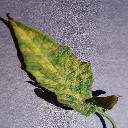

In [31]:
img

In [32]:
x=image.img_to_array(img)

In [33]:
x=np.expand_dims(x,axis=0)

In [34]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 6s 6s/step


In [35]:
y

array([8], dtype=int64)

In [40]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [37]:
index=['Pepper_bell___Bacterial_spot','Pepper_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [38]:
index

['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

In [41]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [42]:
img=image.load_img(r"D:\\Plant Disease/Dataset Plant Disease\Veg-dataset\test_set\Potato___Early_blight\c03a3f69-00b7-4aa5-a49f-794416af0598___RS_Early.B 8112.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper_bell___Bacterial_spot','Pepper_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 125ms/step


'Tomato___Septoria_leaf_spot'

In [43]:
img=image.load_img(r"D:\\Plant Disease/Dataset Plant Disease\Veg-dataset\test_set\Potato___Early_blight\fe24f700-d37f-4e51-b07c-931e8c3ded81___RS_Early.B 8792.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper_bell___Bacterial_spot','Pepper_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 203ms/step


'Tomato___Septoria_leaf_spot'

In [44]:
img=image.load_img(r"D:\\Plant Disease/Dataset Plant Disease\Veg-dataset\test_set\Pepper_bell___Bacterial_spot\ae40949c-47ac-49ce-9a5d-00e15fa79d66___NREC_B.Spot 1785.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper_bell___Bacterial_spot','Pepper_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 156ms/step


'Pepper_bell___Bacterial_spot'